## Business Understanding 

The client wants to better understand user behavior and improve its ecommerce platform. The management has identified several scenarios where more data could be helpful:
* Identify top products based on the total transaction revenue per day.
* Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.
* Identify the most profitable city or province based on the total transaction revenue.

## Data Understanding

In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("ecommerce-session-bigquery.csv", sep=",")
pd.options.display.max_columns=100
df.head()

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productRefundAmount,productQuantity,productPrice,productRevenue,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,20170721,1500643403,PAGE,NaN,NaN,0,NaN,9180781,Suitcase Organizer Cubes,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,20170413,1492114470,PAGE,NaN,NaN,0,NaN,9180793,26 oz Double Wall Insulated Bottle,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,20170727,1501198444,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,20170731,1501522359,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,20170728,1501300311,PAGE,NaN,NaN,0,NaN,9180838,Metal Texture Roller Pen,(not set),(not set),USD,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


In [41]:
# check value each columns
df["transactions"].unique()


array([nan,  1.,  2.,  3.,  6.])

In [42]:
df.columns

Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount',
       'productQuantity', 'productPrice', 'productRevenue', 'productSKU',
       'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',
       'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',
       'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step', 'eCommerceAction_option'],
      dtype='object')

### Melakukan seleksi fitur secara manual berdasarkan business problem and column explanation

'channelGrouping', 'time', 'country', 'city',
'totalTransactionRevenue', 'transactions', 
'date',
'productQuantity', 'productPrice',
'v2ProductName'

1. date, productname, total transaction renevue, transaction,  
2. date, productname, total transaction revenue
3. Date, TTR, city, country, 

channel grouping mana yang menghasilkan checkout lebih besar.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

# Case 1 

In [44]:
selected_columns = ['date', 'productSKU', 'v2ProductName',  'totalTransactionRevenue', 
                    'productPrice', 'transactions','country', 'city', 'channelGrouping']

df_selected = df[selected_columns]
df_selected.head()

,date,productSKU,v2ProductName,totalTransactionRevenue,productPrice,transactions,country,city,channelGrouping
0,20170721,9180781,Suitcase Organizer Cubes,NaN,0,NaN,Taiwan,(not set),Organic Search
1,20170413,9180793,26 oz Double Wall Insulated Bottle,NaN,0,NaN,France,not available in demo dataset,Organic Search
2,20170727,9180838,Metal Texture Roller Pen,NaN,0,NaN,United States,San Francisco,Referral
3,20170731,9180838,Metal Texture Roller Pen,NaN,0,NaN,United States,Boulder,Organic Search
4,20170728,9180838,Metal Texture Roller Pen,NaN,0,NaN,Canada,not available in demo dataset,Organic Search


## Preprocessing

### checking

saya melakukan pengecekan nilai dari kolom totaltransactionrevenue, transaction, productprice dengan hipotesa bahwa ketiga data tersebut saling berkorelasi. dan jika data tersebut berkorelasi kita akan mendapatkan data tambahan untuk total Total Transactionrevenue.

H0 -> totaltransactiorevenue == transaction * productprice 

- Hipotesis salah

In [45]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     10000 non-null  int64  
 1   productSKU               10000 non-null  object 
 2   v2ProductName            10000 non-null  object 
 3   totalTransactionRevenue  619 non-null    float64
 4   productPrice             10000 non-null  int64  
 5   transactions             628 non-null    float64
 6   country                  10000 non-null  object 
 7   city                     10000 non-null  object 
 8   channelGrouping          10000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [46]:
df_filled = df_selected.fillna(0)

In [47]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     10000 non-null  int64  
 1   productSKU               10000 non-null  object 
 2   v2ProductName            10000 non-null  object 
 3   totalTransactionRevenue  10000 non-null  float64
 4   productPrice             10000 non-null  int64  
 5   transactions             10000 non-null  float64
 6   country                  10000 non-null  object 
 7   city                     10000 non-null  object 
 8   channelGrouping          10000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [48]:
df_filled['date'] = df_filled['date'].astype(str)  # konversi tipedata kedalam string sebelum dikonversi ke datetime
df_filled['date'] = pd.to_datetime(df_filled['date'], format='%Y%m%d') # konversi ke datetime dengan format '%Y%m%d' untuk memudahkan analisa   

In [49]:
# Group by productSKU and date, then aggregate totalTransactionRevenue
daily_revenue = df_filled.groupby(['productSKU', df_filled['date'].dt.date]).agg({
    'v2ProductName': 'first',
    'totalTransactionRevenue': 'sum'
}).reset_index()

def get_top_products_for_date(df, date):
    # Filter the daily_revenue DataFrame based on the specified date
    filtered_revenue = df[df['date'] == date]

    # Sort by daily revenue in descending order to get top products
    top_products = filtered_revenue.sort_values(by='totalTransactionRevenue', ascending=False)

    return top_products

# User input for the date (e.g., '2024-07-20')
user_date_input = '2017-04-16'
user_date = pd.to_datetime(user_date_input).date()

# Get top products for the specified date
top_products_for_date = get_top_products_for_date(daily_revenue, user_date)

# Display top products
print(f"Top Products by Daily Revenue for {user_date}:")
top_products_for_date.head(50)

Top Products by Daily Revenue for 2017-04-16:


,productSKU,date,v2ProductName,totalTransactionRevenue
27,9182721,2017-04-16,Google Men's 100% Cotton Short Sleeve Hero Tee...,122390000.0


# Case 2

## 2016-08-01 - 2017-08-01

In [50]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     10000 non-null  datetime64[ns]
 1   productSKU               10000 non-null  object        
 2   v2ProductName            10000 non-null  object        
 3   totalTransactionRevenue  10000 non-null  float64       
 4   productPrice             10000 non-null  int64         
 5   transactions             10000 non-null  float64       
 6   country                  10000 non-null  object        
 7   city                     10000 non-null  object        
 8   channelGrouping          10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 703.2+ KB


Berdasarkan saran dari gpt, anomali detection bisa dilakukan dengan melakukan analisa statistikal. salah satunya adalah dengan menghitung nilai rata-rata dan z-score man menganalisa data yang berada jauh dari matriks tersebut

### Analisa anomali dengan rata-rata

Average number of transactions per day for Google Men's 100% Cotton Short Sleeve Hero Tee Black: 0.25


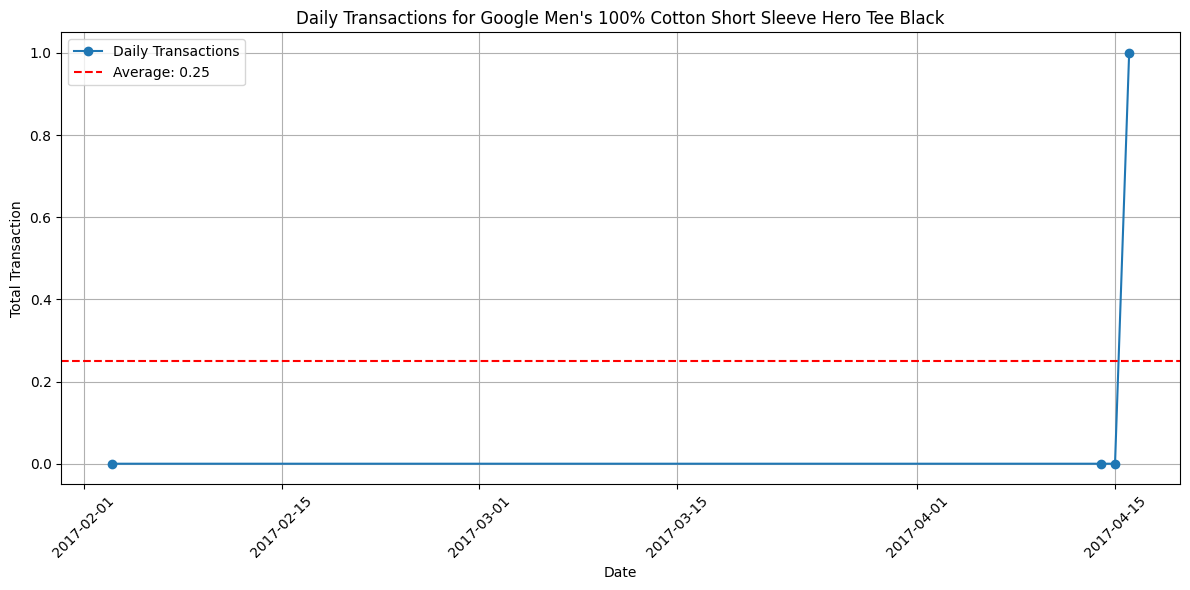

In [56]:
import pandas as pd


# Filter the dataset for a specific product
product_name = "Google Men's 100% Cotton Short Sleeve Hero Tee Black"  # Replace with the specific product name
df_product = df_filled[df_filled['v2ProductName'] == product_name]

# Group by date and calculate the number of transactions per day
daily_transactions = df_product.groupby(df_product['date'].dt.date).agg({
    'transactions': 'sum'
}).reset_index()

# Calculate the average number of transactions per day
average_transactions_per_day = daily_transactions['transactions'].mean()

# Display the results
print(f"Average number of transactions per day for {product_name}: {average_transactions_per_day}")

# Optionally, display daily transactions for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['date'], daily_transactions['transactions'], marker='o', linestyle='-', label='Daily Transactions')
plt.axhline(y=average_transactions_per_day, color='r', linestyle='--', label=f'Average: {average_transactions_per_day:.2f}')
plt.title(f'Daily Transactions for {product_name}')
plt.xlabel('Date')
plt.ylabel('Total Transaction')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Anomali Deteksi dengan Z-Score

Hasilnya tergantung pada threshold yang dipakai

Average number of transactions per day for Google Men's 100% Cotton Short Sleeve Hero Tee Black: 0.25
Anomalies detected using Z-Score:
     datetime  transactions  z_score
3  2017-04-16           1.0      1.5


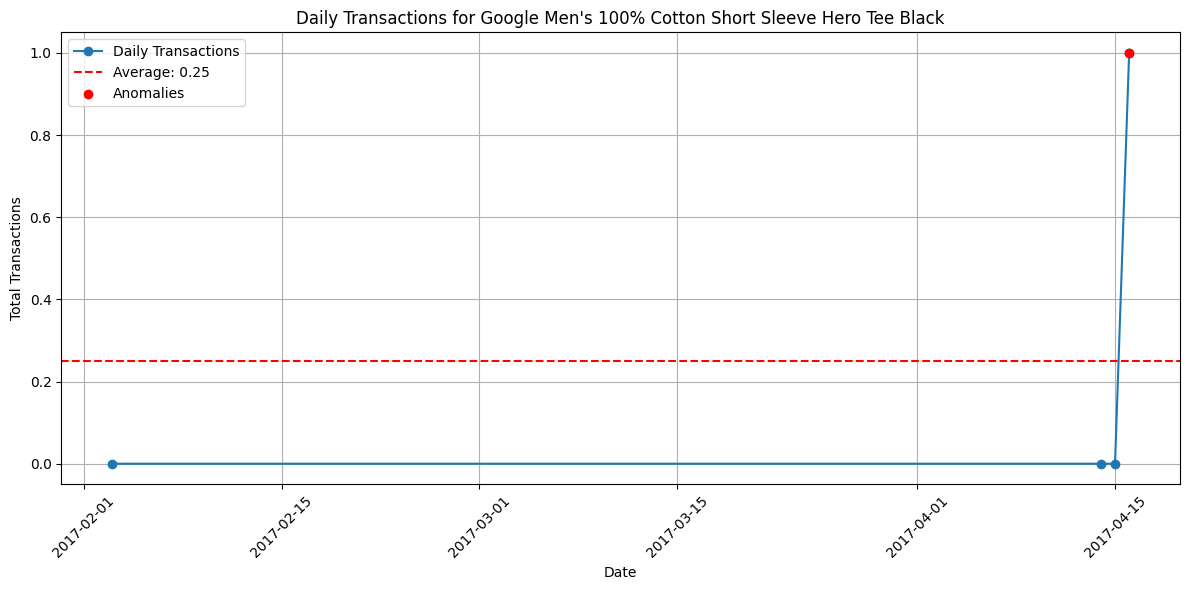

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample dataframe (assuming df_filled is already defined and loaded)
# df_filled = pd.read_csv('your_data.csv') # Example of loading the dataset

# Convert the 'date' column to datetime format if it's not already
df_filled['datetime'] = pd.to_datetime(df_filled['date'])

# Filter the dataset for a specific product
product_name = "Google Men's 100% Cotton Short Sleeve Hero Tee Black"  # Replace with the specific product name
df_product = df_filled[df_filled['v2ProductName'] == product_name]

# Group by date and calculate the number of transactions per day
daily_transactions = df_product.groupby(df_product['datetime'].dt.date).agg({
    'transactions': 'sum'
}).reset_index()

# Calculate the average number of transactions per day
average_transactions_per_day = daily_transactions['transactions'].mean()

# Calculate Z-scores
mean = daily_transactions['transactions'].mean()
std_dev = daily_transactions['transactions'].std()
daily_transactions['z_score'] = (daily_transactions['transactions'] - mean) / std_dev

# Define a threshold for Z-score to detect anomalies (e.g., |Z| > 3)
threshold = 1
anomalies = daily_transactions[daily_transactions['z_score'].abs() > threshold]

# Display the results
print(f"Average number of transactions per day for {product_name}: {average_transactions_per_day:.2f}")
print("Anomalies detected using Z-Score:")
print(anomalies)

# Optionally, display daily transactions for visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['datetime'], daily_transactions['transactions'], marker='o', linestyle='-', label='Daily Transactions')
plt.axhline(y=average_transactions_per_day, color='r', linestyle='--', label=f'Average: {average_transactions_per_day:.2f}')

# Highlight anomalies
plt.scatter(anomalies['datetime'], anomalies['transactions'], color='red', label='Anomalies', zorder=5)

plt.title(f'Daily Transactions for {product_name}')
plt.xlabel('Date')
plt.ylabel('Total Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Case 3

terdapat data sample dengan nilai{'(not set)', 'not available in demo dataset'} 

In [77]:


# Group by city and sum total transaction revenue
city_revenue = df.groupby('city')['totalTransactionRevenue'].sum().reset_index()

# Group by province and sum total transaction revenue
province_revenue = df.groupby('country')['totalTransactionRevenue'].sum().reset_index()

# Find the most profitable city
most_profitable_city = city_revenue.loc[city_revenue['totalTransactionRevenue'].idxmax()]

# Find the most profitable province
most_profitable_province = province_revenue.loc[province_revenue['totalTransactionRevenue'].idxmax()]

# Print results
print("Most Profitable City:")
print(most_profitable_city)

print("\nMost Profitable Province:")
print(most_profitable_province)

Most Profitable City:
city                       not available in demo dataset
totalTransactionRevenue                    65102440000.0
Name: 170, dtype: object

Most Profitable Province:
country                     United States
totalTransactionRevenue    110441990000.0
Name: 101, dtype: object


penambahan baris untuk mengabaikan data tertentu. dalam case ini data '(not set)','not available in demo dataset'

In [27]:
cities_to_ignore = ['(not set)','not available in demo dataset']

# Filter out cities to ignore
df_filtered = df[~df['city'].isin(cities_to_ignore)]

# Group by city and sum total transaction revenue
city_revenue = df_filtered.groupby('city')['totalTransactionRevenue'].sum().reset_index()

# Find the most profitable city
most_profitable_city = city_revenue.loc[city_revenue['totalTransactionRevenue'].idxmax()]

# Print results
print("Most Profitable City (excluding certain cities):")
print(most_profitable_city)

Most Profitable City (excluding certain cities):
city                            New York
totalTransactionRevenue    21250810000.0
Name: 103, dtype: object


gpt link: https://chatgpt.com/share/72a9f89a-c9e6-4d22-baa0-f81ddb51d3cf 